## Importing Necessary Libaries

In [ ]:
# Import 'numpy' and 'pandas' to work with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# Import method to suppress warnings
import warnings
warnings.filterwarnings('ignore')

import os
from PIL import Image

## Loading the data

In [ ]:
#  write the  code for mounting your Google Drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#write the code for unzipping the data and storing it in Google Drive
!unzip /content/weatherdata.zip

Archive:  /content/weatherdata.zip
   creating: weather/test/
   creating: weather/test/cloudy/
  inflating: weather/test/cloudy/cloudy1.jpg  
  inflating: weather/test/cloudy/cloudy103.jpg  
  inflating: weather/test/cloudy/cloudy107.jpg  
  inflating: weather/test/cloudy/cloudy112.jpg  
  inflating: weather/test/cloudy/cloudy158.jpg  
  inflating: weather/test/cloudy/cloudy178.jpg  
  inflating: weather/test/cloudy/cloudy185.jpg  
  inflating: weather/test/cloudy/cloudy202.jpg  
  inflating: weather/test/cloudy/cloudy22.jpg  
  inflating: weather/test/cloudy/cloudy257.jpg  
  inflating: weather/test/cloudy/cloudy267.jpg  
  inflating: weather/test/cloudy/cloudy275.jpg  
  inflating: weather/test/cloudy/cloudy283.jpg  
  inflating: weather/test/cloudy/cloudy40.jpg  
  inflating: weather/test/cloudy/cloudy58.jpg  
   creating: weather/test/rainy/
  inflating: weather/test/rainy/rain1.jpg  
  inflating: weather/test/rainy/rain140.jpg  
  inflating: weather/test/rainy/rain158.jpg  
  inf

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "/content/weather/train"
valid_path = "/content/weather/test"

## Importing VGG16 Pre-trained Model

In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/weather/train/*')

In [ ]:
folders

['/content/weather/train/rainy',
 '/content/weather/train/cloudy',
 '/content/weather/train/sunny']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
len(folders)

3

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

## ImageDataGenerator

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/weather/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 505 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/weather/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 45 images belonging to 3 classes.


## Training and validation Data

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
16/16 [==============================] - 368s 23s/step - loss: 0.9232 - accuracy: 0.6139 - val_loss: 0.7227 - val_accuracy: 0.7111
Epoch 2/20
16/16 [==============================] - 359s 22s/step - loss: 0.2954 - accuracy: 0.8950 - val_loss: 0.5652 - val_accuracy: 0.7556
Epoch 3/20
16/16 [==============================] - 374s 23s/step - loss: 0.1810 - accuracy: 0.9327 - val_loss: 0.4629 - val_accuracy: 0.7778
Epoch 4/20
16/16 [==============================] - 370s 23s/step - loss: 0.1375 - accuracy: 0.9604 - val_loss: 0.4763 - val_accuracy: 0.8000
Epoch 5/20
16/16 [==============================] - 386s 25s/step - loss: 0.1689 - accuracy: 0.9347 - val_loss: 0.5910 - val_accuracy: 0.7778
Epoch 6/20
16/16 [==============================] - 372s 23s/step - loss: 0.0897 - accuracy: 0.9703 - val_loss: 0.4799 - val_accuracy: 0.8222
Epoch 7/20
16/16 [==============================] - 370s 23s/step - loss: 0.0842 - accuracy: 0.9762 - val_loss: 0.4448 - val_accuracy: 0.8222
Epoch 

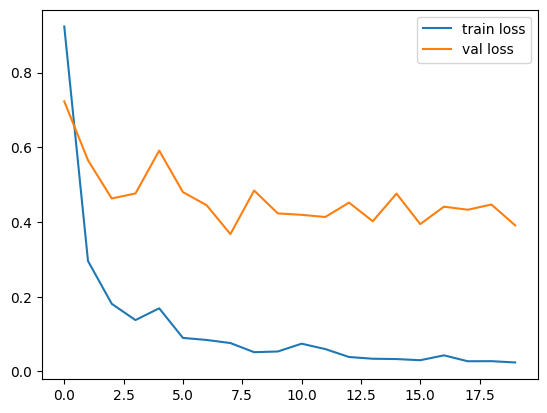

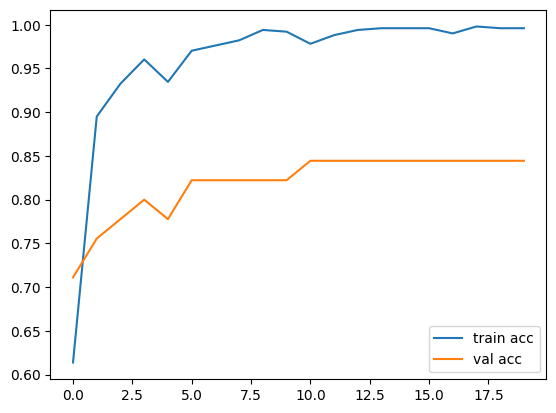

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')